# Phase-field crystal tutorial: Stresses and strains

In this tutorial, we will have a look at stresses and strains in the phase-field crystal. 

We start by initializing a phase-field crystal with a dislocation dipole, if you are confused by this procedure, check out the [PFC basic framework tutorial](https://colab.research.google.com/github/vidarsko/ComFiT/blob/main/tutorial/phase_field_crystal_basic_framework.ipynb). 

In [1]:
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf
import numpy as np
import matplotlib.pyplot as plt


Evolving the PFC:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving the PFC: 100%|██████████| 100/100 [00:00<00:00, 168.89it/s]


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

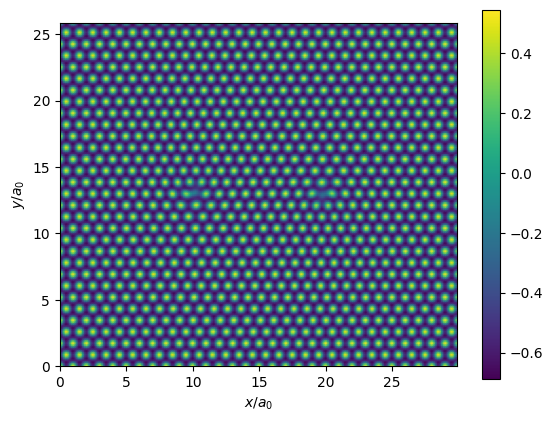

In [2]:
pfc = cf.PhaseFieldCrystal2DTriangular(30, 15)
eta = pfc.calc_amplitudes_with_dislocation_dipole()
pfc.conf_PFC_from_amplitudes(eta)
pfc.evolve_PFC(100)
pfc.plot_field(pfc.psi)

Now we calculate the stress field 

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

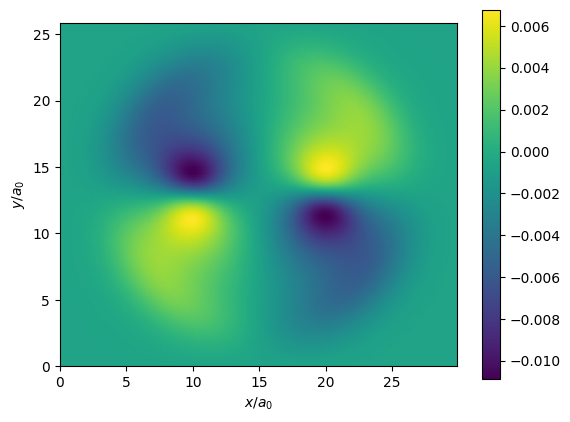

In [3]:
stress =  pfc.calc_stress_tensor()
pfc.plot_field(stress[0])

Above, you see the $xx$ component of the stress, the circular region is an artifact of the initial condition (see [documentation](https://vidarsko.github.io/ComFiT/ClassBaseSystem/#periodic-boundary-conditions-numerical-implementation-of-angle-fields)), and will disappear as the simulation progresses.


The stress tensor is a symmetric tensor and therefore only has three independent components. 
To save memory, these are saved in an array structure `stress[0]`, `stress[1]`, and `stress[2]`, where `stress[0]` is the $xx$ component, `stress[1]` is the $xy$ component, and `stress[2]` is the $yy$ component.
You can extract a specific component from this tensor by using the `get_sym` method.

For more information on this point, see [documentation](https://vidarsko.github.io/ComFiT/ClassBaseSystem/). 

Let us plot all the components in units of the elastic shear modulus `el_mu`. 

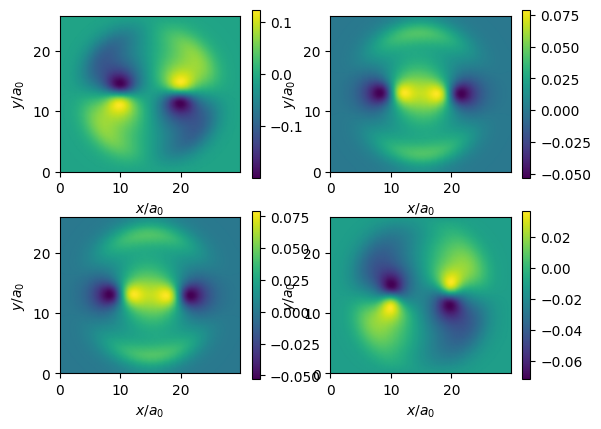

In [4]:
fig = plt.figure()
axs = fig.subplots(2,2)
for i in range(2):
    for j in range(2):
        pfc.plot_field(pfc.get_sym(stress,i,j)/pfc.el_mu,ax=axs[i,j])

Now, lets have a look at stresses for dislocations in other symmetries.
For information on how these are calculated, see the [documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/#elasticity). 

Evolving the PFC:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving the PFC: 100%|██████████| 100/100 [00:00<00:00, 154.38it/s]


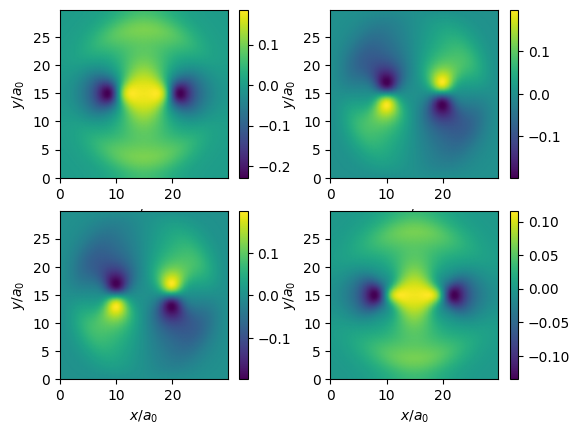

In [5]:
pfc = cf.PhaseFieldCrystal2DSquare(30, 30)
eta = pfc.calc_amplitudes_with_dislocation_dipole(dislocation_type=2)
pfc.conf_PFC_from_amplitudes(eta)
pfc.evolve_PFC(100)

stress = pfc.calc_stress_tensor()

fig = plt.figure()
axs = fig.subplots(2,2)

for i in range(2):
    for j in range(2):
        pfc.plot_field(pfc.get_sym(stress,i,j)/pfc.el_mu,ax=axs[i,j])

In [6]:
# pfc = cf.PhaseFieldCrystal3DBodyCenteredCubic(13, 13, 13)
# eta = pfc.calc_amplitudes_with_dislocation_ring()
# pfc.conf_PFC_from_amplitudes(eta)
# pfc.evolve_PFC(10)

# stress = pfc.calc_stress_tensor()

# fig = plt.figure()
# axs = fig.subplots(3,3,subplot_kw={'projection': '3d'})

# for i in range(3):
#     for j in range(3):
#         pfc.plot_field(pfc.get_sym(stress,i,j)/pfc.el_mu,ax=axs[i,j])

This might not be so informative, so it might be useful to see the plot of the stress field for the xx-component in a plane.

In [7]:
# pfc.plot_field_in_plane(stress[0],normal_vector=[0,1,0])

In [8]:
# pfc = cf.PhaseFieldCrystal3DFaceCenteredCubic(9, 9, 9)
# eta = pfc.calc_amplitudes_with_dislocation_ring()
# pfc.conf_PFC_from_amplitudes(eta)
# pfc.evolve_PFC(10)

# stress = pfc.calc_stress_tensor()

# pfc.plot_field_in_plane(stress[1]/pfc.el_mu)

Evolving the PFC: 100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


(<Figure size 640x480 with 2 Axes>,
 <Axes3D: xlabel='$x/a_0$', ylabel='$y/a_0$', zlabel='$z/a_0$'>)

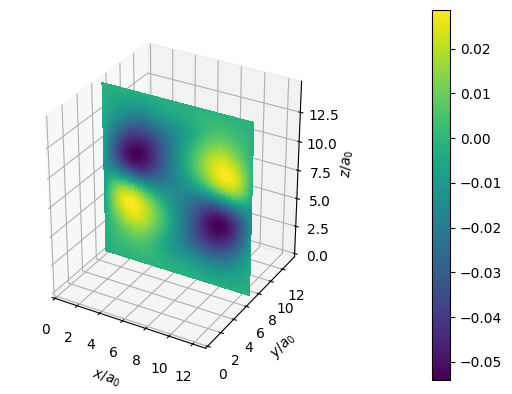

In [9]:
pfc = cf.PhaseFieldCrystal3DSimpleCubic(13, 14, 15)
eta = pfc.calc_amplitudes_with_dislocation_ring()
pfc.conf_PFC_from_amplitudes(eta)
pfc.evolve_PFC(10)

stress = pfc.calc_stress_tensor()

pfc.plot_field_in_plane(stress[3]/pfc.el_mu)


Let us export a rotating plot of the stress field for the $xz$ component.

In [10]:
# _, ax = pfc.plot_field(pfc.get_sym(stress,0,2),number_of_layers=2)
# cf.tool_export_rotating_plot(ax)

We may also have a look at the strain field of the PFC by calculating the strain using the method described in the [documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/).

Evolving the PFC:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving the PFC: 100%|██████████| 100/100 [00:03<00:00, 29.56it/s]


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

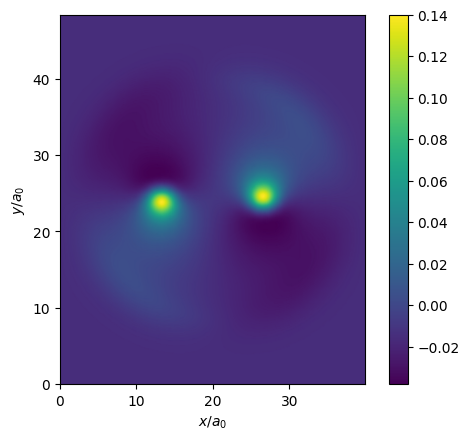

In [11]:
pfc = cf.PhaseFieldCrystal2DTriangular(40, 28)
eta = pfc.calc_amplitudes_with_dislocation_dipole()
pfc.conf_PFC_from_amplitudes(eta)

pfc.evolve_PFC(100)

strain = pfc.calc_strain_tensor()
pfc.plot_field(strain[0])


This shows the $xx$ component of the strain. 
There is some residual stress in the system though, due to the periodic arrangement of peaks and troughs not exactly matching the periodic boundary conditions, see [documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/#elasticity). 
For visualization purposes then, it is useful to subtract the mean value, which we can do by


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

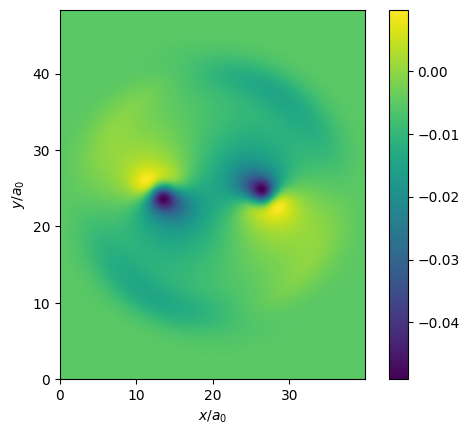

In [26]:
strain = strain - np.mean(strain,axis=0) 
pfc.plot_field(strain[2])